# 利用 matplotlib 分析链家租房数据并制作可视化图表

In [1]:
# 导入一些必要的库
import pandas as pd 

#### TODO1:
读取 CSV 格式文件“task_2_lianjia_data.csv”，将数据命名为 lianjia_data，并选取前部数据查看(阅读 参考文章 1、2)

In [2]:
lianjia_data = pd.read_csv("task_2_lianjia_data.csv")
lianjia_data.head()

,简介（方式·小区名 户型 朝向）,区,地铁站,村,面积大小（㎡）,朝向,户型,楼层类型,楼层（层）,标签
0,整租·长桥一村 1室0厅 南,徐汇,长桥,长桥一村,39,南,1室0厅1卫,高楼层,6,随时看房
1,整租·馨宁公寓 1室1厅 南,徐汇,华泾,馨宁公寓,42,南,1室1厅1卫,高楼层,29,"精装,随时看房"
2,整租·长桥三村 2室1厅 南,徐汇,长桥,长桥三村,51,南,2室1厅1卫,高楼层,6,随时看房
3,整租·东湾小区 1室1厅 南,徐汇,华泾,东湾小区,47,南,1室1厅1卫,中楼层,6,随时看房
4,整租·花苑村紫竹园 1室1厅 南,徐汇,康健,花苑村紫竹园,42,南,1室1厅1卫,高楼层,6,随时看房


#### TODO2: 
利用 groupby 函数，以【面积大小(m²)】字段进行 groupby，统计各个面积下的【房源数量】情况(阅读参考 文章 3、4)

In [3]:
lianjia_squre = lianjia_data.groupby('面积大小（㎡）')['面积大小（㎡）'].agg('count')
lianjia_squre = lianjia_squre.to_frame()
lianjia_squre.columns = ['房源数量']
lianjia_squre.head(10)

,房源数量
面积大小（㎡）,
7,1
9,3
10,1
11,1
12,1
13,1
14,2
15,5
16,4


#### TODO3
  将第(2)问所统计数据，作折线图和条形图，并得出相关结论(阅读参考文章 5、6)，提示:先提取第(2)问 所得数据表的 index 索引，
饼转化成 list;再提取【房源数量】的值转成 list(阅读参考文章 7、8)

In [4]:
import matplotlib.pyplot as plt

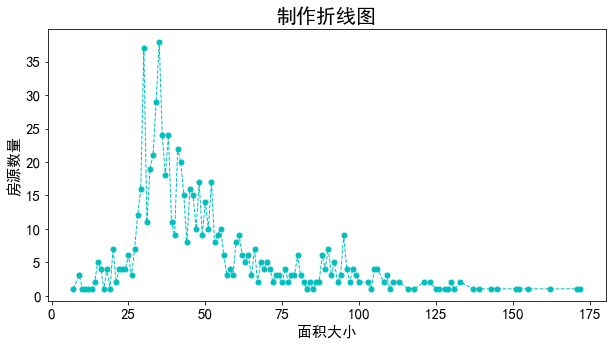

In [132]:
# 制作折线图
x = lianjia_squre.index.values.tolist()
y = lianjia_squre['房源数量'].values.tolist()
# 配置中文环境
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['savefig.dpi'] = 900
plt.figure(figsize = (10, 5)) 

plt.xlabel('面积大小', fontsize=15)
plt.ylabel('房源数量',fontsize=15)
plt.title('制作折线图',fontsize=20) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.plot(x,y,color='c', marker='o', linestyle='dashed', linewidth=1, markersize=5)

plt.show()

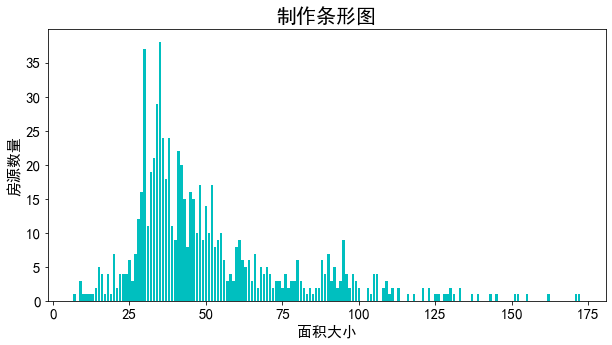

In [133]:
# 制作条形图
x = lianjia_squre.index.values.tolist()
y = lianjia_squre['房源数量'].values.tolist()
plt.rcParams['savefig.dpi'] =900
plt.figure(figsize = (10, 5)) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.xlabel('面积大小', fontsize=15)
plt.ylabel('房源数量', fontsize=15)
plt.title('制作条形图', fontsize=20) 
plt.bar(x,y,color='c')

plt.show()

#### TODO4: 
利用 groupby 函数，以【区】字段进行 groupby，统计各个上海各个“区”所属的【房源数量】情况

In [8]:
lianjia_district = lianjia_data.groupby('区')['区'].agg("count")
lianjia_district = lianjia_district.to_frame()
lianjia_district.columns = ['房源数量']
lianjia_district.head(10)

,房源数量
区,
嘉定,6
奉贤,1
徐汇,126
普陀,22
杨浦,56
松江,45
浦东,106
虹口,24
长宁,86


#### TODO5:
将第(4)问所统计数据，作条形图，并得出相关结论

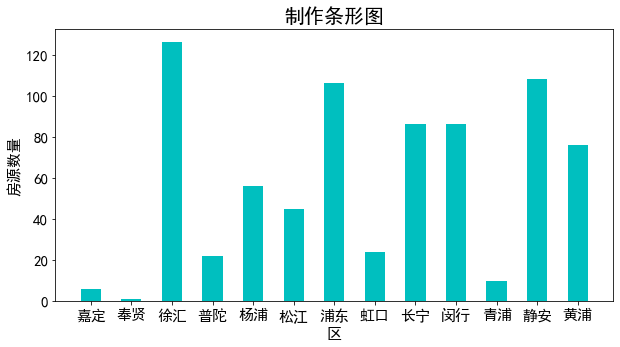

In [134]:
# 制作条形图
x = lianjia_district.index.values.tolist()
y = lianjia_district['房源数量'].values.tolist()


plt.rcParams['savefig.dpi'] =900
plt.figure(figsize = (10, 5)) 

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('区', fontsize=15)
plt.ylabel('房源数量', fontsize=15)
plt.title('制作条形图', fontsize=20) 
plt.bar(x,y,[0.5],color='c')

plt.show()

#### TODO6: 利用 groupby 函数，以【楼层类型】字段进行 groupby，统计各个楼层所属的【房源数量】情况

In [101]:
lianjia_type = lianjia_data.groupby('楼层类型')['楼层类型'].agg("count")
lianjia_type = lianjia_type.to_frame()
lianjia_type.columns = ['房源数量']
lianjia_type.head(10)

,房源数量
楼层类型,
中楼层,231
低楼层,146
地下室,5
高楼层,370


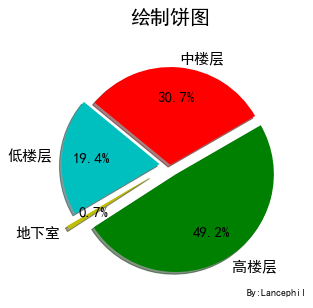

In [138]:
# 制作条形图
x_ = lianjia_type.index.tolist()
y = lianjia_type['房源数量'].values.tolist()
x =[x.strip() for x in x_] #去除原文件中的空格

plt.rcParams['savefig.dpi'] =1000
plt.figure(figsize = (10, 5)) 
plt.title("绘制饼图", 
          fontsize=20
         )
plt.text(1.2,
         -0.7,
         'By:Lancephil', 
         fontsize=10
        )

plt.pie(y,
        labels=x,
        explode=[0,0.1,0.2,0.1],
        colors=('r', 'c', 'y', 'g'),    
        autopct='%1.1f%%',
        pctdistance=0.7, 
        shadow=True,
        labeldistance=1.1,
        startangle=30, 
        radius=0.9,
        counterclock=True, 
        wedgeprops=None,
        textprops={'fontsize':15,'color':'black'},
        center = (0.5, 0.5), 
        frame = False
       )



plt.show()